# Data Mining - Clustering - K Means

In [14]:
from os.path import join
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import KMeans

from sklearn.manifold import TSNE
import plotly.express as px

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

import shap

import umap.umap_ as umap

sns.set()

In [2]:
data = pd.read_csv('data_cleaned.csv')
data_raw = pd.read_sas('a2z_insurance.sas7bdat', index = 'CustID')
data_unscaled = pd.read_csv('data_cleaned_uscaled.csv')

### Defining the number of clusters:

#### Inertia (within-cluster sum-of-squares distance)

In [3]:
range_clusters = range(1, 11)

inertia = []
for n_clus in range_clusters:  # iterate over desired ncluster range
    kmclust = KMeans(n_clusters=n_clus, init='k-means++', n_init=15, random_state=1)
    kmclust.fit(data)
    inertia.append(kmclust.inertia_)  # save the inertia of the given cluster solution
    

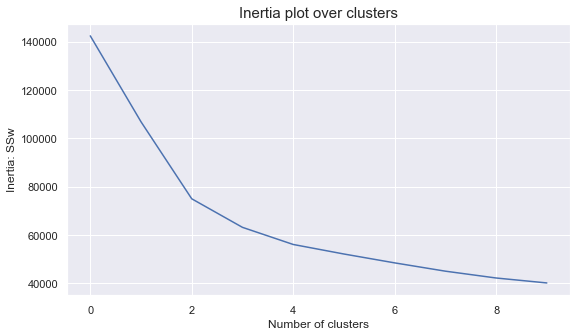

In [4]:
plt.figure(figsize=(9,5))
plt.plot(inertia)
plt.ylabel("Inertia: SSw")
plt.xlabel("Number of clusters")
plt.title("Inertia plot over clusters", size=15)
plt.show()

#### Silhouette Coefficient

For n_clusters = 2, the average silhouette_score is : 0.3328814257164393
For n_clusters = 3, the average silhouette_score is : 0.32788114328927953
For n_clusters = 4, the average silhouette_score is : 0.22099479454112086
For n_clusters = 5, the average silhouette_score is : 0.23072248320739747
For n_clusters = 6, the average silhouette_score is : 0.19776448239532451
For n_clusters = 7, the average silhouette_score is : 0.2148468001160881
For n_clusters = 8, the average silhouette_score is : 0.199774645132078
For n_clusters = 9, the average silhouette_score is : 0.18958181279619357
For n_clusters = 10, the average silhouette_score is : 0.18438246837161887


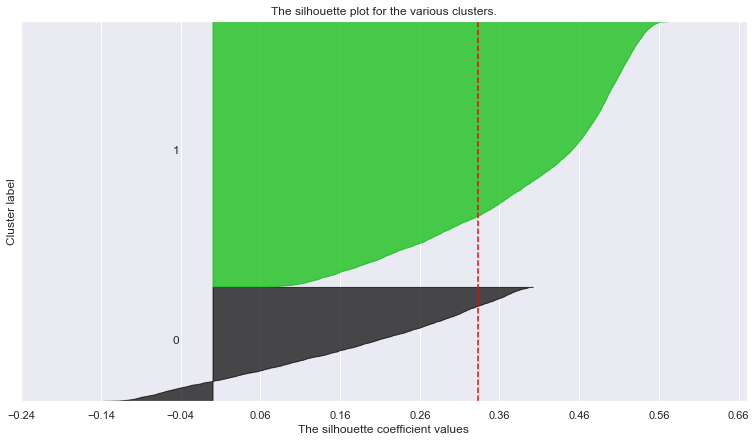

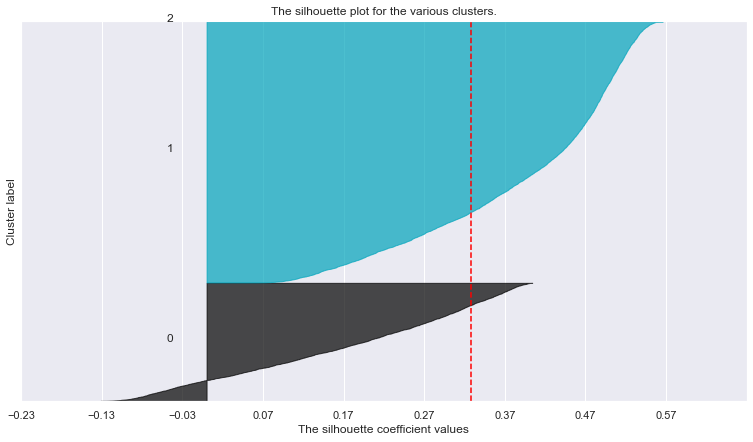

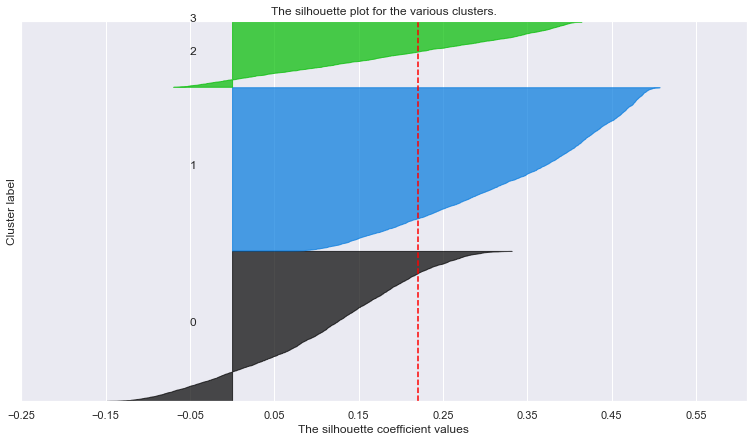

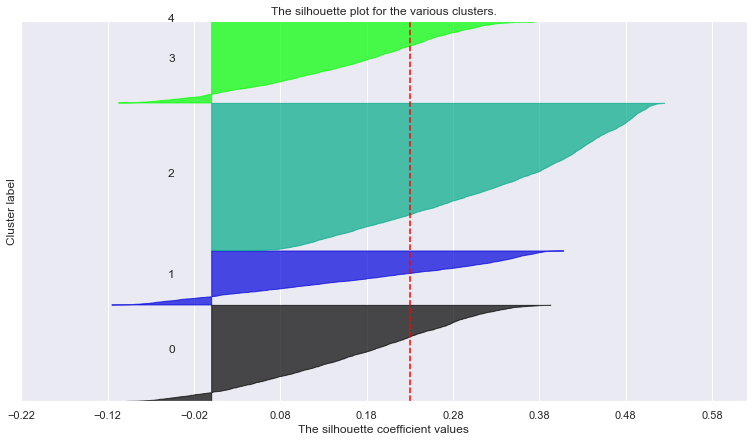

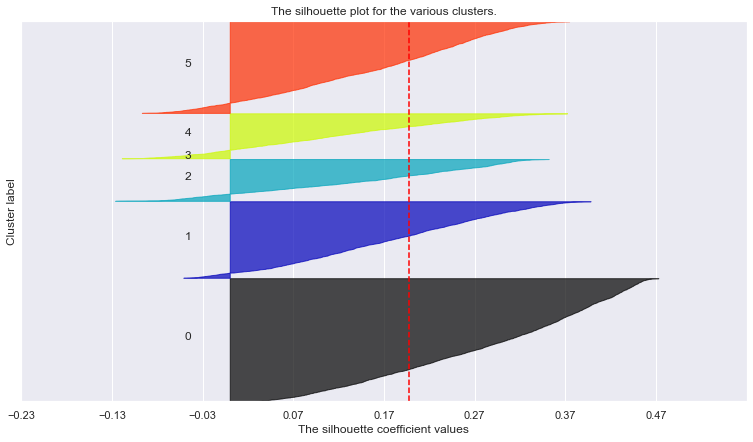

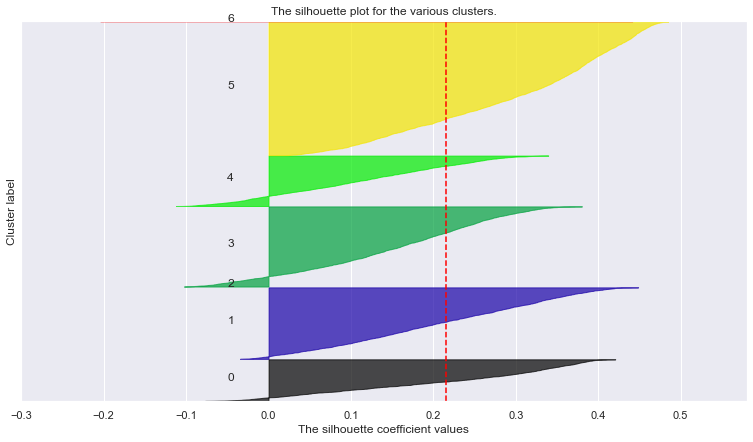

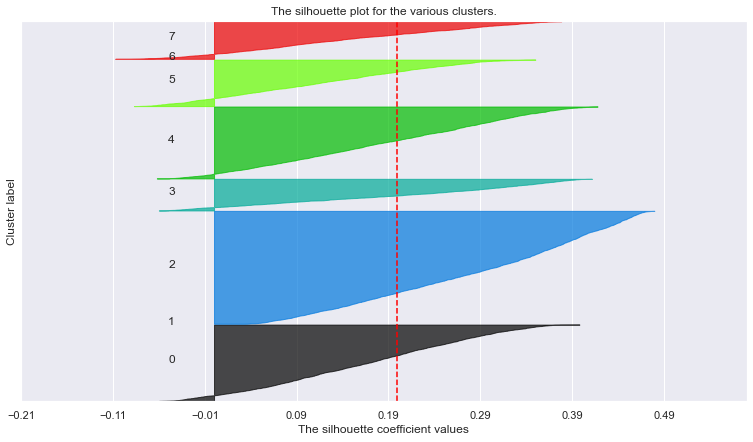

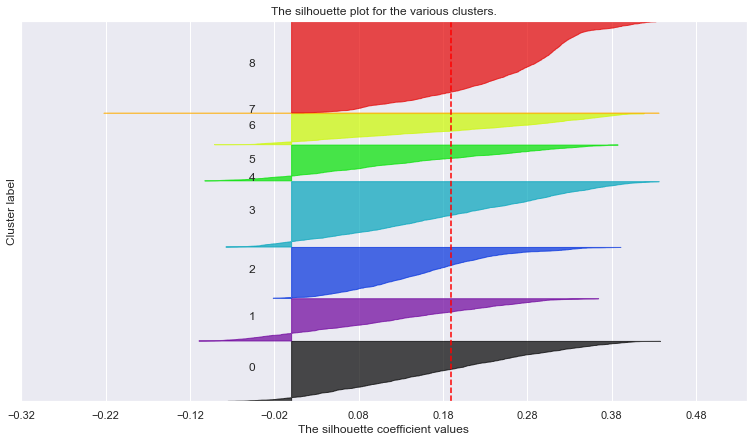

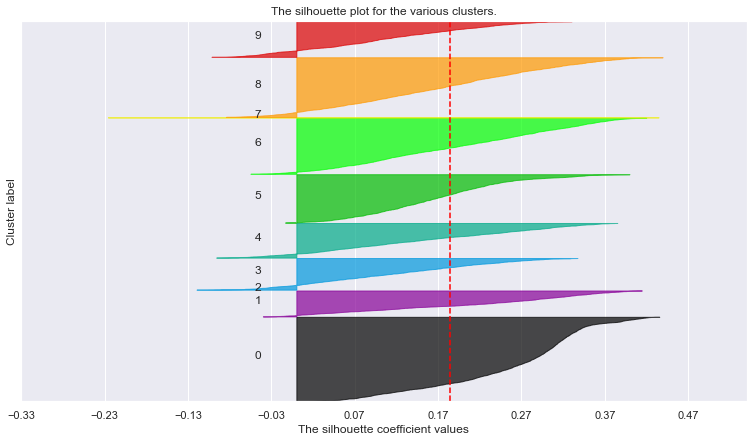

In [5]:
# Adapted from:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py

# negative explained: https://stackoverflow.com/questions/63639841/how-can-silhouette-scores-be-negative

# Storing average silhouette metric
avg_silhouette = []
for nclus in range_clusters:
    # Skip nclus == 1
    if nclus == 1:
        continue
    
    # Create a figure
    fig = plt.figure(figsize=(13, 7))

    # Initialize the KMeans object with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    kmclust = KMeans(n_clusters=nclus, init='k-means++', n_init=15, random_state=1)
    cluster_labels = kmclust.fit_predict(data)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed clusters
    silhouette_avg = silhouette_score(data, cluster_labels)
    avg_silhouette.append(silhouette_avg)
    print(f"For n_clusters = {nclus}, the average silhouette_score is : {silhouette_avg}")

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(data, cluster_labels)

    y_lower = 10
    for i in range(nclus):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        
        # Get y_upper to demarcate silhouette y range size
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        
        # Filling the silhouette
        color = cm.nipy_spectral(float(i) / nclus)
        plt.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    plt.title("The silhouette plot for the various clusters.")
    plt.xlabel("The silhouette coefficient values")
    plt.ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    plt.axvline(x=silhouette_avg, color="red", linestyle="--")
    
    # The silhouette coefficient can range from -1, 1
    xmin, xmax = np.round(sample_silhouette_values.min() -0.1, 2), np.round(sample_silhouette_values.max() + 0.1, 2)
    plt.xlim([xmin, xmax])
    
    # The (nclus+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    plt.ylim([0, len(data) + (nclus + 1) * 10])

    plt.yticks([])  # Clear the yaxis labels / ticks
    plt.xticks(np.arange(xmin, xmax, 0.1))
    

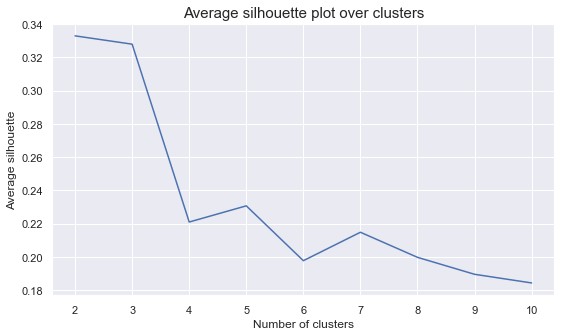

In [6]:
plt.figure(figsize=(9,5))
plt.plot(range_clusters[1:],avg_silhouette)
plt.ylabel("Average silhouette")
plt.xlabel("Number of clusters")
plt.title("Average silhouette plot over clusters", size=15)
plt.show()

In [70]:
# final cluster solution
number_clusters = 3
kmclust = KMeans(n_clusters=number_clusters, init='k-means++', n_init=15, random_state=1)
labels = kmclust.fit_predict(data)
labels

array([1, 0, 0, ..., 1, 0, 1], dtype=int32)

In [87]:
df_final = pd.concat((data, pd.Series(labels, name='labels')), axis=1)
df_final.groupby('labels').mean()

,BirthYear,EducDeg,MonthSal,GeoLivArea,Children,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork,TotalPrem,PC0,PC1,PC2,PC3,PC4
labels,,,,,,,,,,,,,,,,,
0,0.261689,-1.082647,-0.240823,-0.100169,-0.360988,-0.041262,-0.690294,1.142731,0.240592,1.001656,0.977170,1.301531,1.732677,-0.870271,-0.014332,-0.080095,-0.108261
1,-0.081945,-0.247061,0.102986,-0.096597,-0.263264,-0.080959,0.298739,-0.161783,-0.042576,-0.044656,-0.070450,-0.174127,-0.800204,0.385006,0.006341,0.035600,0.047932
2,0.172414,-1.000000,0.061460,0.333333,0.000000,0.440678,0.971511,2.147735,-1.183797,-0.320468,-0.301266,128.546284,108.826797,63.280771,1.039795,4.668147,7.612233


In [91]:

overwiev_mean(features, labels)

/var/folders/dw/f6xwpmns6s321gz1zdbmff6w0000gn/T/ipykernel_35009/3689607225.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,BirthYear,EducDeg,MonthSal,GeoLivArea,Children,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork,TotalPrem
labels,,,,,,,,,,,,
0,0.261689,-1.082647,-0.240823,-0.100169,-0.360988,-0.041262,-0.690294,1.142731,0.240592,1.001656,0.977170,1.301531
1,-0.081945,-0.247061,0.102986,-0.096597,-0.263264,-0.080959,0.298739,-0.161783,-0.042576,-0.044656,-0.070450,-0.174127
2,0.172414,-1.000000,0.061460,0.333333,0.000000,0.440678,0.971511,2.147735,-1.183797,-0.320468,-0.301266,128.546284


### Analysing the appropriateness of our solution - R²

In [78]:
ssw_labels = df_final[data.columns.to_list() + ["labels"]].groupby(by='labels').apply(get_ss)  # compute ssw for each cluster labels
ssw_labels


labels
0    36075.859160
1    38949.695025
2        0.000000
dtype: float64

In [86]:
def r2(features, labels):
    
    def get_ss(data):
        ss = np.sum(data.var() * (data.count() - 1))
        return ss  # return sum of sum of squares of each df variable

    sst = get_ss(features)  # get total sum of squares
    features['labels'] = labels.tolist()
    ssw_labels = features.groupby(by='labels').apply(get_ss)  # compute ssw for each cluster labels
    ssb = sst - np.sum(ssw_labels)  # remember: SST = SSW + SSB
    r2 = ssb / sst
    print(r2)

r2(features, labels)


0.4543822966924672


/var/folders/dw/f6xwpmns6s321gz1zdbmff6w0000gn/T/ipykernel_35009/2752078147.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [63]:
def ttsne(df, labels):
    tsne = TSNE(n_components=3, random_state=0)
    projections = tsne.fit_transform(df)

    fig = px.scatter_3d(
        projections, x=0, y=1, z=2,
        color=labels, labels={'color': 'label'}
    )
    fig.update_traces(marker_size=2)
    fig.show()

    
def uumap(df,labels):
    reducer = umap.UMAP()
    embedding2_pca = reducer.fit_transform(df)

    plt.scatter(
        embedding2_pca[:, 0],
        embedding2_pca[:, 1],
        c=[sns.color_palette()[x] for x in labels])
    plt.gca().set_aspect('equal', 'datalim')
    plt.show()   


def uumap_3d(df_plot, labels):
    reducer = umap.UMAP(n_components=3)
    embedding = reducer.fit_transform(df_plot)

    fig = px.scatter_3d(
        embedding, x=embedding[:, 0], y=embedding[:, 1], z=embedding[:, 2],
        color=labels, labels={'color': 'label'}
    )
    fig.update_traces(marker_size=2)
    fig.show()
    
def sshap(X,y):
    
    train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)
    my_model = RandomForestClassifier(random_state=0).fit(train_X, train_y)

    explainer = shap.TreeExplainer(my_model)
    shap_values = explainer.shap_values(val_X)
    
    for i in range(np.unique(y).sum()):

        shap.summary_plot(shap_values[i-1], val_X)


In [58]:
labels = km_labels

features = data.iloc[:, :-5]         # without PCAs
#features = data.iloc[:, -5:]         # only PCAs
#features = data                      # all features


In [76]:
features+labels

ValueError: Unable to coerce to Series, length must be 12: given 10133

In [59]:
ttsne(features,labels)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



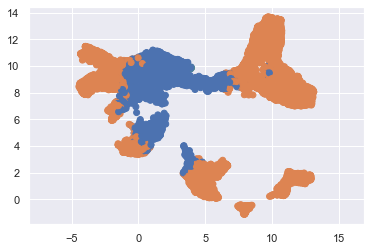

In [60]:
uumap(features,labels)

In [61]:
uumap_3d(features,labels)

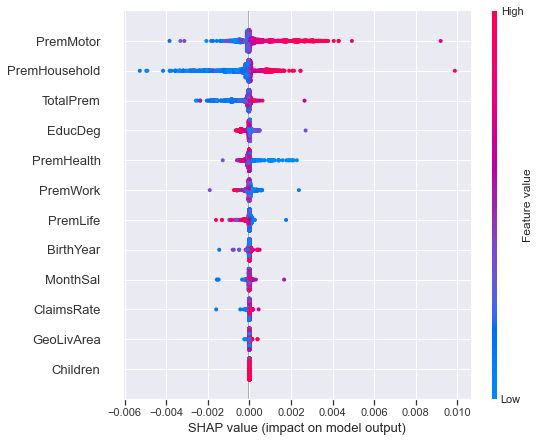

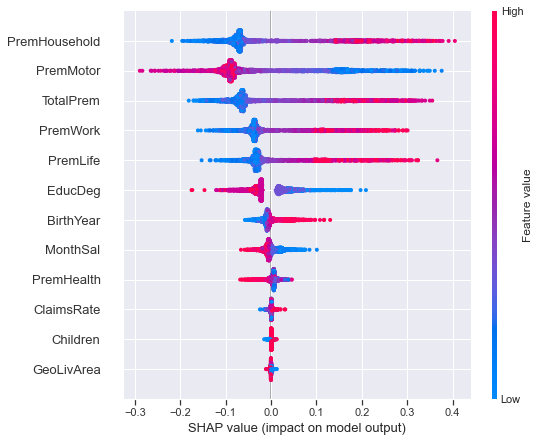

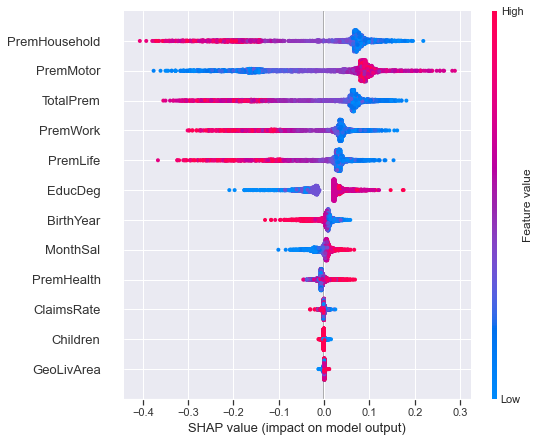

In [62]:
sshap(features,labels)

In [57]:
#sns.pairplot(df_final, hue='km_labels', palette = 'husl')